**MSc Computational Physics AUTH**<br>
**Computational Nuclear Physics**<br>
**Academic Year: 2023-2024**<br>
**Semester 2**<br>
**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Presentation date: 9/7/2024**

# **PROJECT #4:** ***A study of electron scattering: examining various charge distributions of nuclei***
**Jupyter Notebook**<br> 

**Contents:**<br>
*->1. Brief theoretical introduction*<br>
*->2. Codes*<br>
*->3. Results*

**References:**<br>
*1. W. N. Cottingham, D. A. Greenwood - An Introduction to Nuclear Physics  -Cambridge University Press (2001)*

## **1. Brief theoretical introduction**

***A. Project's Goal***

**Scattering** is the main phenomenon we can exploit to study the structure and thus the behaviour of particles in the microcosm. Electron scattering, in particular, is useful for finding the distribution of the positive charge of protons in a nucleus. We will consider three types of possible **charge distributions** (**Gaussian**,**Wood-Saxon** and **Step functions**) for the nuclei of some elements and examine how they affect the **differential cross section** of an electron beam scattered by the corresponding nucleus.

***B. Distribution density functions***

The **Gaussian** (**G** from now on) distribution has the following density function:
$$ρ_{ch_G}(r) = \frac{ρ_0}{\sqrt{2πσ^2}}e^{-\frac{(r-μ)^2}{2σ^2}}$$
where $r$ is distance from the center of the nucleus, $ρ_0$ a normalization constant, $μ$ is the mean-value for $r$ and $σ$ the standard deviation for $r$. We will consider $μ=0$, so that the distribution is symmetric with respect to the centre of the nucleus. We will, also, consider $σ=R/2$ (with $R$ the radius of the nucleus), so that the distribution lie within the radius $R$.

The **Wood-Saxon** (**WS** from now on) has density function:
$$ρ_{ch_{WS}}(r) = \frac{ρ_0}{1+e^{\frac{r-R}{a}}}$$
where $R$ is the radius of the nucleus and $a$ is the depth of the nucleus surface.

Finally, the **Step** function has the following formula:
$$ρ_{ch_{Step}}(r) = \begin{cases} ρ_0 & 0\leq r\leq L\\0 & r>L \end{cases}$$ 
where the zeroing point $r=L$ can be chosen arbitrarily. In our study we will consider $L=R$ (i.e equal to nucleus radius), in order to directly examine the differences between the smoother Wood-Saxon distribution and the much smoother Gaussian distribution.

***C. Density function's normalization***

The density functions need to be normalized with respect to atomic number $Z$. That is:
$$4π\int_{0}^{\infty}ρ_{ch}(r)r^2dr=Z$$

***D. Calculation of the differential cross-section***

Once normalized, the density function $ρ_{ch}$ is used to calculate the differential cross section $\frac{dσ}{dΩ}$. The formula is:
$$\frac{dσ}{dΩ}=\left(\frac{Ε}{2π}\right)^2\left(\frac{1}{\hbar c}\right)^4\frac{1}{q^4}\left(\frac{e^2}{ε_ο}I\right)^2$$
where $q$ is the norm of the momentum vector, given by:
$$q = |\textbf{q}| = (2E/\hbar c)sin(θ/2)$$
with $E$ the electrons beam energy and $θ$ the scattering angle. The symbol $I$ is the following integral:
$$I = \intρ_{ch}(r)e^{i\textbf{q}*\textbf{r}}d^3\textbf{r}$$
as $\frac{dσ}{dΩ}$ is the **Fourier transformation** of $ρ_{ch}$. 

***E. Simplifying the integral of the differential cross-section***

The integral above can be simplified, according to the following:
$$I = \int_{0}^{2π} \int_{0}^{π} \int_{0}^{\infty} ρ_{ch}(r)e^{iqrcosθ}r^2 sinθ dr dθ dφ$$
$$I = 2π\int_{0}^{\infty} r^2ρ_{ch}(r)\left(\int_{0}^{\infty} e^{iqrcosθ} sinθ dθ\right) dr = 2π\int_{0}^{\infty} r^2ρ_{ch}(r)\left(\int_{-1}^{1} e^{iqrcosθ} d(cosθ)\right)dr$$
or by setting $x = cosθ$ (where $θ$ is the integral's and not the scattering angle):
$$Ι = 2π\int_{0}^{\infty} r^2ρ_{ch}(r)\left[\frac{e^{iqrx}}{iqr}\right]_{x=-1}^{1} dr = \frac{2π}{iq} \int_{0}^{\infty} rρ_{ch}(r)\left[e^{iqr}-e^{-iqr}\right]dr$$
or
$$I = \frac{2π}{iq} \int_{0}^{\infty} 2irρ_{ch}(r)sin(qr) dr = \frac{4π}{q}\int_{0}^{\infty} rρ_{ch}(r)sin(qr) dr$$ 

## **2. Codes**

The codes we developed in this Jupyter Notebook, are presented below:

### **2.1 Preliminary work**

First, we import the necessary **Python** libraries (modules). We use:

1. **Numpy** library for numerical calculations
2. **Sympy** library for symbolic display and symbolic calculations
3. **Matplotlib** library for plotting and visualization
4. **Quad** package from **Scipy.integrate** library for faster integration
5. **Time** library for measuring the time of processes
6. **PrettyTable** library for displaying the results of the calculations

In [114]:
import numpy as np
import sympy as smp
from sympy import *
from scipy.integrate import quad
import matplotlib.pyplot as plt
import time as time
from prettytable import PrettyTable

The definition of useful symbols and constants comes next:

In [115]:
# Symbols definition
r,q,R,a,m,s,th,th_acc,phi,rho0 = smp.symbols("r,q,R,a,μ,σ,θ,θ',φ,ρ0")
pi_s = smp.pi # symbolic/analytical expression of π
pi_n = np.pi # numerical value of π
i = smp.I # symbolic expression of the imaginary unit i
inf = float("inf") # assigning the infity to a value

# Constants definition
hbarc = 197.326 # hbar*c in MeV*fm
e_ch = 1.60217663*10**(-19) # absolute electron charge in C
eps_0 = 8.854*10**(-12) # vacuum permittivity in C^2 J^(-1) m^(-1)
eps1_0 = eps_0/(6.242*10**(27)) # vacuum permittivity in C^2 MeV^(-1) fm^(-1)
eps2_0 = 55.263*10**(-3) # vacuum permittivity in e^2 MeV^(-1) fm^(-1)

We finish the preliminary work with the definition of a function thet returns the name of an element, by importing it's atomic number **Z**:

In [116]:
# Elements Atomic Number Table

elements = [
    [1, 'H'], [2, 'He'], [3, 'Li'], [4, 'Be'], [5, 'B'], [6, 'C'], [7, 'N'], [8, 'O'], [9, 'F'], [10, 'Ne'],
    [11, 'Na'], [12, 'Mg'], [13, 'Al'], [14, 'Si'], [15, 'P'], [16, 'S'], [17, 'Cl'], [18, 'Ar'], [19, 'K'], [20, 'Ca'],
    [21, 'Sc'], [22, 'Ti'], [23, 'V'], [24, 'Cr'], [25, 'Mn'], [26, 'Fe'], [27, 'Co'], [28, 'Ni'], [29, 'Cu'], [30, 'Zn'],
    [31, 'Ga'], [32, 'Ge'], [33, 'As'], [34, 'Se'], [35, 'Br'], [36, 'Kr'], [37, 'Rb'], [38, 'Sr'], [39, 'Y'], [40, 'Zr'],
    [41, 'Nb'], [42, 'Mo'], [43, 'Tc'], [44, 'Ru'], [45, 'Rh'], [46, 'Pd'], [47, 'Ag'], [48, 'Cd'], [49, 'In'], [50, 'Sn'],
    [51, 'Sb'], [52, 'Te'], [53, 'I'], [54, 'Xe'], [55, 'Cs'], [56, 'Ba'], [57, 'La'], [58, 'Ce'], [59, 'Pr'], [60, 'Nd'],
    [61, 'Pm'], [62, 'Sm'], [63, 'Eu'], [64, 'Gd'], [65, 'Tb'], [66, 'Dy'], [67, 'Ho'], [68, 'Er'], [69, 'Tm'], [70, 'Yb'],
    [71, 'Lu'], [72, 'Hf'], [73, 'Ta'], [74, 'W'], [75, 'Re'], [76, 'Os'], [77, 'Ir'], [78, 'Pt'], [79, 'Au'], [80, 'Hg'],
    [81, 'Tl'], [82, 'Pb'], [83, 'Bi'], [84, 'Po'], [85, 'At'], [86, 'Rn'], [87, 'Fr'], [88, 'Ra'], [89, 'Ac'], [90, 'Th'],
    [91, 'Pa'], [92, 'U'], [93, 'Np'], [94, 'Pu'], [95, 'Am'], [96, 'Cm'], [97, 'Bk'], [98, 'Cf'], [99, 'Es'], [100, 'Fm'],
    [101, 'Md'], [102, 'No'], [103, 'Lr'], [104, 'Rf'], [105, 'Db'], [106, 'Sg'], [107, 'Bh'], [108, 'Hs'], [109, 'Mt'], 
    [110, 'Ds'], [111, 'Rg'], [112, 'Cn'], [113, 'Nh'], [114, 'Fl'], [115, 'Mc'], [116, 'Lv'], [117, 'Ts'], [118, 'Og']
]

# Find element from atomic number
def find_elmt(Z):
    m = len(elements)
    for i in range(0,m):
        if elements[i][0]==Z:
            return elements[i][1]
            break
    return 'no element'        

### **2.2 Charge distribution in a nucleus**

#### **2.2.1 Defining the charge density functions $\rho_{ch}$**

In [117]:
# Charge density distrinution functions

# Gaussian distribution (without normalization constant ρ_0)
def rho_ch_G(r,m,s):
    return smp.exp(-(r-m)**2/(2*s**2))/smp.sqrt(2*pi_n*s**2)

# Gaussian distribution (with normalization constant ρ_0)
def rho_ch_G_norm(r,m,s,rho0):
    return rho0*rho_ch_G(r,m,s)

# Wood-Saxon distribution (without normalization constant ρ_0)
def rho_ch_WS(r,R,a):
    return 1/(1+smp.exp((r-R)/a))

# Wood-Saxon distribution (with normalization constant ρ_0)
def rho_ch_WS_norm(r,R,a,rho0):
    return rho0*rho_ch_WS(r,R,a)

# Step function distribution (without normalization constant ρ_0)
def rho_ch_Step(r,L):
    if r<=L:
        return 1
    elif r>L:
        return 0

# Step function distribution (with normalization constant ρ_0)
def rho_ch_Step_norm(r,L,rho0):
    if r<=L:
        return rho0
    elif r>L:
        return 0

#### **2.2.2 Normalizing the charge density function $\rho_{ch}$**

In [118]:
# Calculating the normalization constant ρ_0
def find_rho0(Z,c,distribution):
    if distribution == 'G': # Gaussian distribution selected
        I = 4*np.pi*quad(lambda r: rho_ch_G(r,c[0],c[1])*r**2,0,inf)[0]
    elif distribution == 'WS': # Wood-Saxon distribution selected
        I = 4*np.pi*quad(lambda r: rho_ch_WS(r,c[0],c[1])*r**2,0,inf)[0]
    elif distribution == 'Step': # Step function distribution selected
        I = 4*np.pi*quad(lambda r: rho_ch_Step(r,c)*r**2,0,inf)[0]       
    rho0 = Z/I
    return rho0

# Normalization check for the density function
def norm_check(Z,c,rho0,distribution):
    if distribution == 'G': # Gaussian distribution selected
        return 4*np.pi*quad(lambda r: rho_ch_G_norm(r,c[0],c[1],rho0)*r**2,0,inf)[0]
    elif distribution == 'WS': # Wood-Saxon distribution selected
        return 4*np.pi*quad(lambda r: rho_ch_WS_norm(r,c[0],c[1],rho0)*r**2,0,inf)[0]
    elif distribution == 'Step': # Step function distribution selected
        return 4*np.pi*quad(lambda r: rho_ch_Step_norm(r,c,rho0)*r**2,0,inf)[0]      

### **2.3 Calculating the differential cross-section $\frac{d\sigma}{d\Omega}$**

In [119]:
# Norm of the momentum vector q
def q_norm(E,theta):
    theta = pi_n*theta/180 # convert degrees to radians
    return (2*E/hbarc)*np.sin(theta/2)

In [120]:
# Integral in the calculation of the differential cross section (Gauss)
def diff_cs_int_G(q,m,s,rho_0):
    return 4*np.pi/q*quad(lambda r: r*smp.sin(q*r)*rho_ch_G_norm(r,m,s,rho_0),0,inf)[0]

# Integral in the calculation of the differential cross section (Wood-Saxon)
def diff_cs_int_WS(q,R,a,rho_0):
    return 4*np.pi/q*quad(lambda r: r*smp.sin(q*r)*rho_ch_WS_norm(r,R,a,rho_0),0,inf)[0]

# Integral in the calculation of the differential cross section (Step function)
def diff_cs_int_Step(q,L,rho_0):
    return 4*np.pi/q*quad(lambda r: r*smp.sin(q*r)*rho_ch_Step_norm(r,L,rho_0),0,inf)[0]

In [121]:
# Calculation of the differential cross section (Gauss)
def diff_cs_G(E,theta,m,s,rho_0):
    return np.power(E/(2*np.pi),2)*np.power(1/hbarc,4)*np.power(1/q_norm(E,theta),4)*np.power(diff_cs_int_G(q_norm(E,theta),m,s,rho_0)/eps2_0,2)

# Calculation of the differential cross section (Wood-Saxon)
def diff_cs_WS(E,theta,R,a,rho_0):
    return np.power(E/(2*np.pi),2)*np.power(1/hbarc,4)*np.power(1/q_norm(E,theta),4)*np.power(diff_cs_int_WS(q_norm(E,theta),R,a,rho_0)/eps2_0,2)

# Calculation of the differential cross section (Wood-Saxon)
def diff_cs_Step(E,theta,L,rho_0):
    return np.power(E/(2*np.pi),2)*np.power(1/hbarc,4)*np.power(1/q_norm(E,theta),4)*np.power(diff_cs_int_Step(q_norm(E,theta),L,rho_0)/eps2_0,2)

### **2.4 Visualizing the results**

#### **2.4.1 Calculating the normalization constant $\rho_0$ and plotting the charge density function $\rho_{ch}(r)$**

In [122]:
def plot_rho(rmin,rmax,Z,R,a):
    n = len(Z) # finding number of nuclei to be examined
    rho0_vals_G = [] # initializing storage list for ρ_0 values of Gauss
    rho0_vals_WS = [] # initializing storage list for ρ_0 values of Wood-Saxon
    rho0_vals_Step = [] # initializing storage list for ρ_0 values of Step function
    norm_check_G = [] # normalization check for Gauss density function
    norm_check_WS = [] # normalization check for Wood-Saxon density function
    norm_check_Step = [] # normalization check for Step function density function
    elmt_names = [] # initializing list for the names of the elements
    results = PrettyTable()
    results_check = PrettyTable()
    
    # Initializing plotting variables
    fig_G, ax_G = plt.subplots(1,1)
    fig_WS, ax_WS = plt.subplots(1,1)
    fig_Step, ax_Step = plt.subplots(1,1)  
    plot_points = 200
    radius_vals = np.linspace(rmin,rmax,plot_points) # distance from nucleus center values

    for i in range(0,n):
        rho0_G = find_rho0(Z[i],[0,R[i]/2],'G') # ρ_0 calculation for Gaussian distribution
        rho0_WS = find_rho0(Z[i],[R[i],a[i]],'WS') # ρ_0 calculation for Wood-Saxon distribution
        rho0_Step = find_rho0(Z[i],R[i],'Step') # ρ_0 calculation for Step function distribution
        rho0_vals_G.append(rho0_G) # storaging the ρ_0 values of Gauss
        rho0_vals_WS.append(rho0_WS) # storaging the ρ_0 values of Wood-Saxon
        rho0_vals_Step.append(rho0_Step) # storaging the ρ_0 values of Step function

        norm_G = norm_check(Z[i],[0,R[i]/2],rho0_G,'G') # calculating the norm of the normalized Gauss function
        norm_WS = norm_check(Z[i],[R[i],a[i]],rho0_WS,'WS') # calculating the norm of the normalized Wood-Saxon function
        norm_Step = norm_check(Z[i],R[i],rho0_Step,'Step') # calculating the norm of the normalized Step function
        norm_check_G.append(norm_G) # storaging the norm of Gauss function
        norm_check_WS.append(norm_WS) # storaging the norm of Wood-Saxon function
        norm_check_Step.append(norm_Step) # storaging the norm of Step function

        elmt_name = find_elmt(Z[i]) # finding element name by atomic number
        elmt_names.append(elmt_name)
        rho_vals_G = [] # initializing list to storage for ρ_ch values for the current element (Gauss)
        rho_vals_WS = [] # initializing list to storage for ρ_ch values for the current element (Wood-Saxon)
        rho_vals_Step = [] # initializing list to storage for ρ_ch values for the current element (Wood-Saxon)
        for j in range(0,plot_points):
            rho_val_G = rho_ch_G_norm(radius_vals[j],0,R[i]/2,rho0_G)
            rho_val_WS = rho_ch_WS_norm(radius_vals[j],R[i],a[i],rho0_WS)
            rho_val_Step = rho_ch_Step_norm(radius_vals[j],R[i],rho0_Step)
            rho_vals_G.append(rho_val_G)
            rho_vals_WS.append(rho_val_WS)
            rho_vals_Step.append(rho_val_Step)
        # Plotting the charge density ρ_ch values vs radius  
        ax_G.plot(radius_vals,rho_vals_G,label="$_{%d}%s$"%(Z[i],elmt_name))
        ax_WS.plot(radius_vals,rho_vals_WS,label="$_{%d}%s$"%(Z[i],elmt_name))
        ax_Step.plot(radius_vals,rho_vals_Step,label="$_{%d}%s$"%(Z[i],elmt_name))
    
    print(">>CALCULATION OF ρ_0 RESULTS:")
    results.add_column("Element",elmt_names)
    results.add_column("Z",Z)
    results.add_column("Radius R (fm)",R)
    results.add_column("Surf. depth a (fm)",a)
    results.add_column("Gauss ρ_0 (fm)^(-3)",rho0_vals_G)
    results.add_column("Wood-Saxon ρ_0 (fm)^(-3)",rho0_vals_WS)
    results.add_column("Step Function ρ_0 (fm)^(-3)",rho0_vals_Step)
    print(results)

    print("\n>>RESULTS VALIDATION:")
    results_check.add_column("Element",elmt_names)
    results_check.add_column("Z",Z)
    results_check.add_column("Radius R (fm)",R)
    results_check.add_column("Surf. depth a (fm)",a)
    results_check.add_column("Norm Gauss",norm_check_G)
    results_check.add_column("Norm Wood-Saxon",norm_check_WS)
    results_check.add_column("Norm Step Function",norm_check_Step)
    print(results_check)
    
    # Adding labels, title, legends and grid for clarity
    print("\n>>CHARGE DENSITY DISTRIBUTION PLOT:")  
    ax_G.set_title("Gaussian Charge Distribution")
    ax_G.set_xlabel("Radius r ($fm$)")
    ax_G.set_ylabel("Density function ρ$_{ch}$ $(fm)^{-3}$")    
    ax_G.set_xlim(rmin,rmax)
    ax_G.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    ax_G.grid()

    ax_WS.set_title("Wood-Saxon Charge Distribution")
    ax_WS.set_xlabel("Radius r ($fm$)")
    ax_WS.set_ylabel("Density function ρ$_{ch}$ $(fm)^{-3}$")    
    ax_WS.set_xlim(rmin,rmax)
    ax_WS.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    ax_WS.grid()

    ax_Step.set_title("Step Function Charge Distribution")
    ax_Step.set_xlabel("Radius r ($fm$)")
    ax_Step.set_ylabel("Density function ρ$_{ch}$ $(fm)^{-3}$")    
    ax_Step.set_xlim(rmin,rmax)
    ax_Step.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    ax_Step.grid()
    
    # Return the calculated ρ_0 values
    return [rho0_vals_G,rho0_vals_WS,rho0_vals_Step]

        

#### **2.4.2 Plotting the differential cross-section $\frac{d\sigma}{d\Omega}$ as a function of scattering angle $\theta$**

In [123]:
def plot_diffcs(Z,R,a,rho0_G,rho0_WS,rho0_Step,E,theta_min,theta_max):
    n = len(E)
    elmt_name = find_elmt(Z)
    plot_points = 20
    theta_val = np.linspace(theta_min,theta_max,plot_points)
    fig, ax = plt.subplots(1,1)
    print(">>SUPERVISING THE CALCULATIONS PROCESS OF dσ/dΩ FOR [%s-%d] NUCLEUS:"%(elmt_name,Z))
    print('--------------------------------------------')
    for i in range(0,n): # running for the given energies
        print(">Electron beam energy: E=%.2f MeV"%E[i])
        diff_cs_vals_G = []
        diff_cs_vals_WS = []
        diff_cs_vals_Step = []
        start_time = time.time()
        for j in range(0,plot_points): # running for the values of scattering angle in the given range
            diff_cs_vals_G.append(diff_cs_G(E[i],theta_val[j],0,R/2,rho0_G))
            diff_cs_vals_WS.append(diff_cs_WS(E[i],theta_val[j],R,a,rho0_WS))
            diff_cs_vals_Step.append(diff_cs_Step(E[i],theta_val[j],R,rho0_Step))
        end_time = time.time()
        print("Calculations of dσ/dΩ DONE !!! (e.t. %.3f sec)"%(end_time-start_time))        
        start_time = time.time()
        ax.plot(theta_val,diff_cs_vals_G,lw=1.2,label="E_beam = %.2f MeV (G)"%E[i])
        ax.plot(theta_val,diff_cs_vals_WS,'--',lw=1.2,label="E_beam = %.2f MeV (WS)"%E[i])
        ax.plot(theta_val,diff_cs_vals_Step,'o',ms=3,label="E_beam = %.2f MeV (Step)"%E[i])
        end_time = time.time()
        print("Plotting of dσ/dΩ DONE !!! (e.t. %.3f sec)"%(end_time-start_time))
        print('--------------------------------------------')    
    print("\n>>PLOT OF dσ/dΩ vs scattering angle θ:")        
    ax.set_xlabel("θ [degrees]")
    ax.set_ylabel("dσ/dΩ [$(fm)^2/steradian$]")
    ax.set_title("Differential cross section distribution for $_{%d}%s$"%(Z,elmt_name))
    ax.set_yscale("log")
    ax.legend(bbox_to_anchor=(1.01, 1.), loc='upper left')
    ax.grid()    

## **3. Results**

### **Electron scattering on $_{8}^{16}O$, $_{47}^{109}Ag$, $_{79}^{197}Au$ and $_{82}^{208}Pb$ nuclei**

#### **3.1 Charge density distribution of $_{8}^{16}O$, $_{47}^{109}Ag$, $_{79}^{197}Au$ and $_{82}^{208}Pb$ nuclei**

>>CALCULATION OF ρ_0 RESULTS:
+---------+----+---------------+--------------------+---------------------+--------------------------+-----------------------------+
| Element | Z  | Radius R (fm) | Surf. depth a (fm) | Gauss ρ_0 (fm)^(-3) | Wood-Saxon ρ_0 (fm)^(-3) | Step Function ρ_0 (fm)^(-3) |
+---------+----+---------------+--------------------+---------------------+--------------------------+-----------------------------+
|    O    | 8  |      2.61     |       0.513        |  0.7476340891855162 |   0.07775121638008316    |      0.1074186907849624     |
|    Ag   | 47 |      5.33     |       0.523        |  1.053230829116098  |   0.06767099516576913    |     0.07410160617275754     |
|    Au   | 79 |      6.63     |        0.45        |  1.1441426037104283 |    0.0618995520159174    |     0.06471394796558097     |
|    Pb   | 82 |      6.65     |       0.526        |  1.1804583941238433 |   0.06269581584286621    |     0.06656720264243936     |
+---------+----+---------------+-------

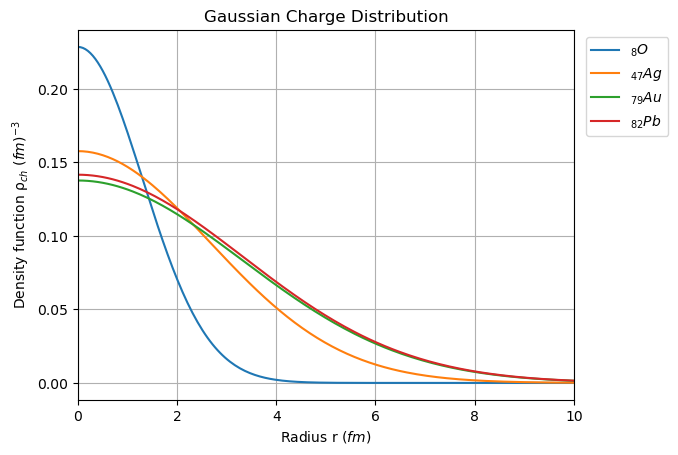

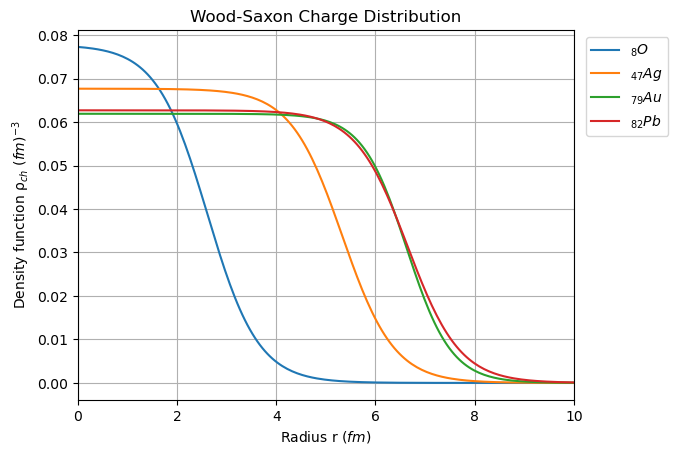

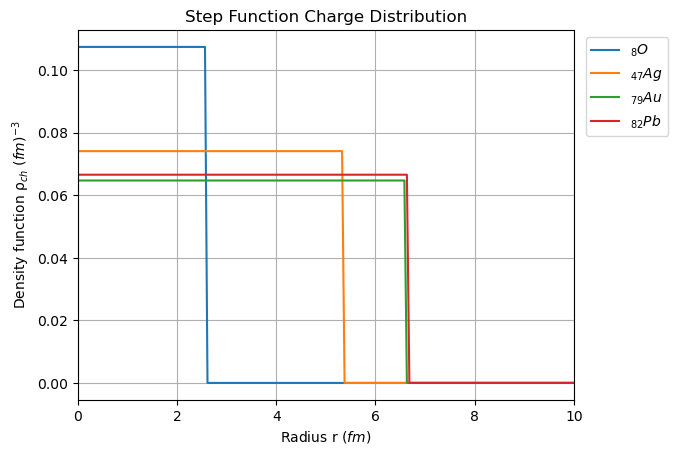

In [124]:
# Atomic numbers
Z_O = 8
Z_Ag = 47
Z_Au = 79
Z_Pb = 82
Z_vals = [Z_O,Z_Ag,Z_Au,Z_Pb]

# Radius of nuclei in fm
R_O = 2.61
R_Ag = 5.33
R_Au = 6.63
R_Pb = 6.65
R_vals = [R_O,R_Ag,R_Au,R_Pb]

# Surface depth of nuclei in fm
a_O = 0.513
a_Ag = 0.523
a_Au = 0.45
a_Pb = 0.526
a_vals = [a_O,a_Ag,a_Au,a_Pb]

# Charge density distrinution normalization and plotting
rho0_vals = plot_rho(0,10,Z_vals,R_vals,a_vals)

#### **3.2 Differential cross-section ($\frac{d\sigma}{d\theta}$) vs scattering angle ($\theta$) plot**

##### **A. Oxygen $_{8}^{16}O$ nucleus**

In [125]:
# Minimum required electron beam energy in MeV
E_min_O = hbarc/(2*R_O)
E_min_O

37.80191570881226

>>SUPERVISING THE CALCULATIONS PROCESS OF dσ/dΩ FOR [O-8] NUCLEUS:
--------------------------------------------
>Electron beam energy: E=10.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 6.134 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=50.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 10.100 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.013 sec)
--------------------------------------------
>Electron beam energy: E=126.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 10.429 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.001 sec)
--------------------------------------------
>Electron beam energy: E=183.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 9.423 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.002 sec)
--------------------------------------------

>>PLOT OF dσ/dΩ vs scattering angle θ:


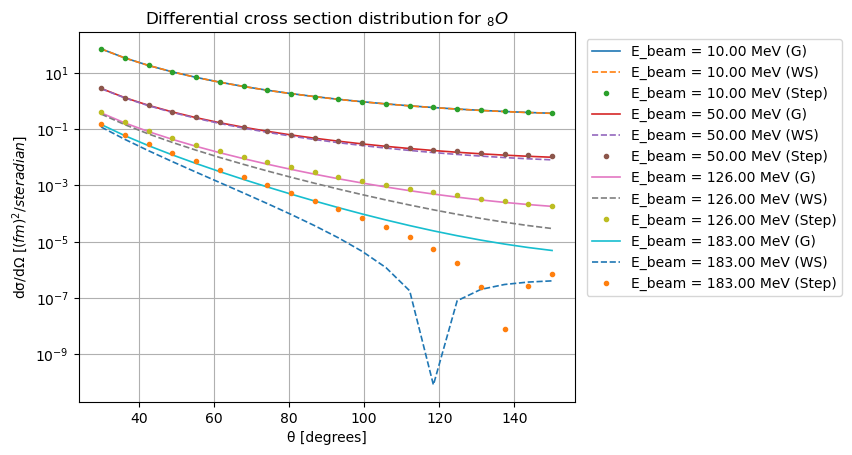

In [126]:
# Plotting the dσ/dΩ vs scattering angle θ diagram 
# for different values of electron beam energy 
rho0_O_G = rho0_vals[0][0]
rho0_O_WS = rho0_vals[1][0]
rho0_O_Step = rho0_vals[2][0]
#display(rho0_O_G,rho0_O_WS)
E_O_vals = [10,50,126,183]
plot_diffcs(Z_O,R_O,a_O,rho0_O_G,rho0_O_WS,rho0_O_Step,E_O_vals,30,150)

##### **B. Silver $_{47}^{109}Ag$ nucleus**

In [127]:
# Minimum required electron beam energy in MeV
E_min_Ag = hbarc/(2*R_Ag)
E_min_Ag

18.510881801125702

>>SUPERVISING THE CALCULATIONS PROCESS OF dσ/dΩ FOR [Ag-47] NUCLEUS:
--------------------------------------------
>Electron beam energy: E=10.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.058 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.001 sec)
--------------------------------------------
>Electron beam energy: E=50.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.407 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=126.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.110 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=183.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.663 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.008 sec)
--------------------------------------------

>>PLOT OF dσ/dΩ vs scattering angle θ:


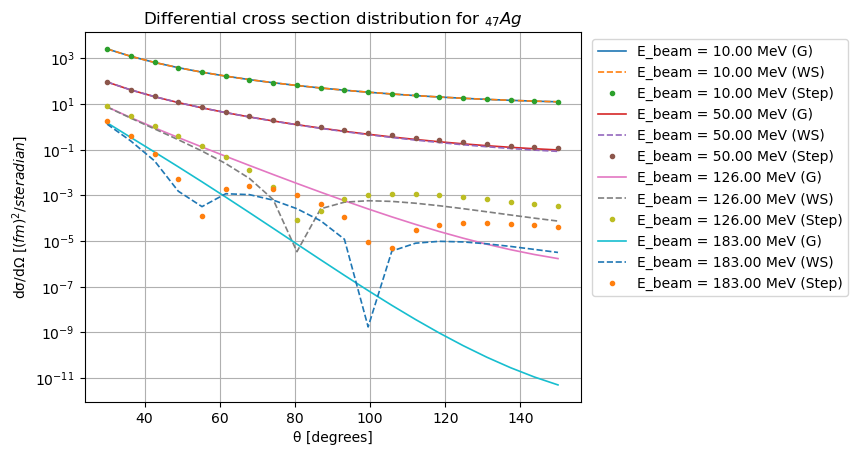

In [128]:
# Plotting the dσ/dΩ vs scattering angle θ diagram 
# for different values of electron beam energy 
rho0_Ag_G = rho0_vals[0][1]
rho0_Ag_WS = rho0_vals[1][1]
rho0_Ag_Step = rho0_vals[2][1]
#display(rho0_Ag_G,rho0_Ag_WS)
E_Ag_vals = [10,50,126,183]
plot_diffcs(Z_Ag,R_Ag,a_Ag,rho0_Ag_G,rho0_Ag_WS,rho0_Ag_Step,E_Ag_vals,30,150)

##### **C. Gold $_{79}^{197}Au$ nucleus**

In [129]:
# Minimum required electron beam energy in MeV
E_min_Au = hbarc/(2*R_Au)
E_min_Au

14.881297134238311

>>SUPERVISING THE CALCULATIONS PROCESS OF dσ/dΩ FOR [Au-79] NUCLEUS:
--------------------------------------------
>Electron beam energy: E=10.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 7.401 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=50.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 7.611 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=126.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.331 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.001 sec)
--------------------------------------------
>Electron beam energy: E=183.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.656 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------

>>PLOT OF dσ/dΩ vs scattering angle θ:


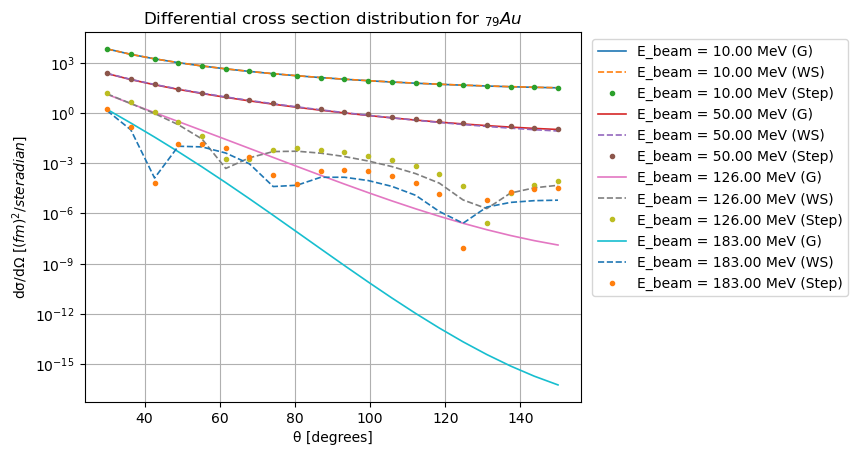

In [130]:
# Plotting the dσ/dΩ vs scattering angle θ diagram 
# for different values of electron beam energy 
rho0_Au_G = rho0_vals[0][2]
rho0_Au_WS = rho0_vals[1][2]
rho0_Au_Step = rho0_vals[2][2]
#display(rho0_Au_G,rho0_Au_WS)
E_Au_vals = [10,50,126,183]
plot_diffcs(Z_Au,R_Au,a_Au,rho0_Au_G,rho0_Au_WS,rho0_Au_Step,E_Au_vals,30,150)

##### **D. Lead $_{82}^{208}Pb$ nucleus**

In [131]:
# Minimum required electron beam energy in MeV
E_min_Pb = hbarc/(2*R_Pb)
E_min_Pb

14.836541353383458

>>SUPERVISING THE CALCULATIONS PROCESS OF dσ/dΩ FOR [Pb-82] NUCLEUS:
--------------------------------------------
>Electron beam energy: E=10.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 7.487 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=50.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 7.699 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.002 sec)
--------------------------------------------
>Electron beam energy: E=126.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 8.648 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.000 sec)
--------------------------------------------
>Electron beam energy: E=183.00 MeV
Calculations of dσ/dΩ DONE !!! (e.t. 9.016 sec)
Plotting of dσ/dΩ DONE !!! (e.t. 0.001 sec)
--------------------------------------------

>>PLOT OF dσ/dΩ vs scattering angle θ:


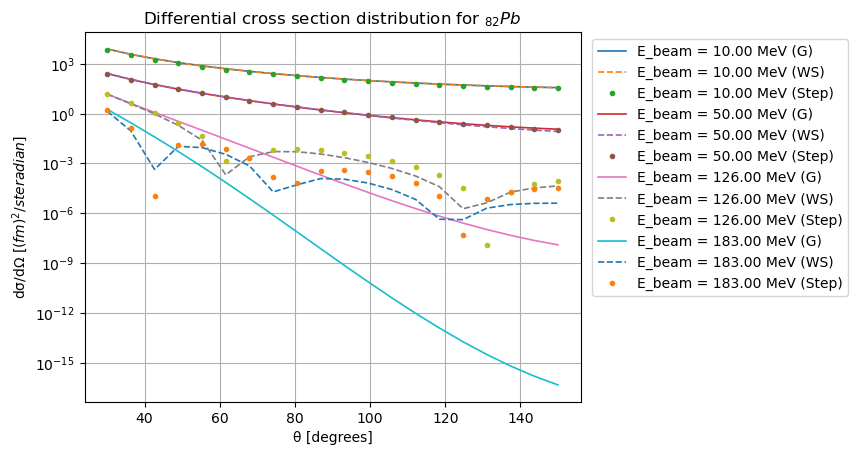

In [132]:
# Plotting the dσ/dΩ vs scattering angle θ diagram 
# for different values of electron beam energy 
rho0_Pb_G = rho0_vals[0][3]
rho0_Pb_WS = rho0_vals[1][3]
rho0_Pb_Step = rho0_vals[1][3]
#display(rho0_Pb_G,rho0_Pb_WS)
E_Pb_vals = [10,50,126,183]
plot_diffcs(Z_Pb,R_Pb,a_Pb,rho0_Pb_G,rho0_Pb_WS,rho0_Pb_Step,E_Pb_vals,30,150)